In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
area = meshmask.e1t[0] * meshmask.e2t[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [6]:
base_diatoms = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['diatoms'])
base_nitrate = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['nitrate'])
base_silicon = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['silicon'])
base_ammonium = xr.open_mfdataset('/results2/SalishSea/nowcast-green.202111/0[12345]jan18/SalishSea_1h_2018010[12345]_2018010[12345]_biol_T.nc', 
                                  data_vars = ['ammonium'])
new = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/fixed_restart/SalishSea_1h_20180101_20180131_biol_T.nc')


In [5]:
def planview(base, new, field, it, ide, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(f'Base {field}')

    new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz].where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]-
     base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]).where(
        tmask[ide, 400+iz:500-iz, 250+iz:350-iz]
     ).plot(ax=axs[2], cmap=cm_bwr, 
                                                              vmax=dvmax, vmin=-dvmax)
    axs[2].set_title(f'Difference (New-Base) {field}')

    for ax in axs:
        viz_tools.set_aspect(ax)

    fig.suptitle(f'Depth {base.deptht[ide].values:.0f} m')

    axs[0].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[0].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[1].scatter(304 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(304 - 280, 447 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 446 - 430, marker = 'x', color = 'm')
    axs[1].scatter(305 - 280, 447 - 430, marker = 'x', color = 'm')

    axs[2].scatter(304 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(304 - 280, 447 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 446 - 430, marker = 'x', color = 'g')
    axs[2].scatter(305 - 280, 447 - 430, marker = 'x', color = 'g')

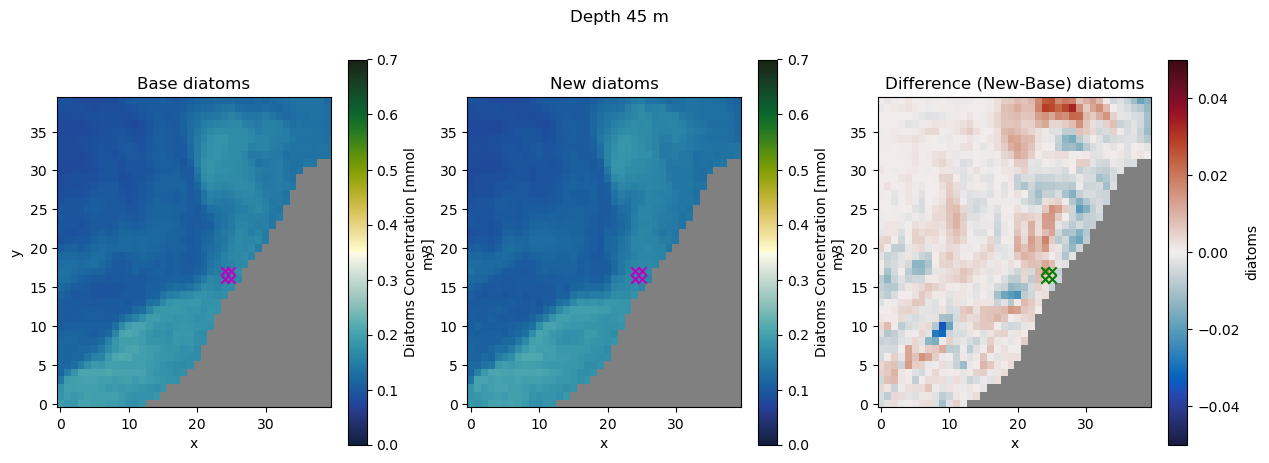

In [6]:
planview(base_diatoms, new, 'diatoms', 119, 23 , cm_delta, 0.7, 0, 0.05)

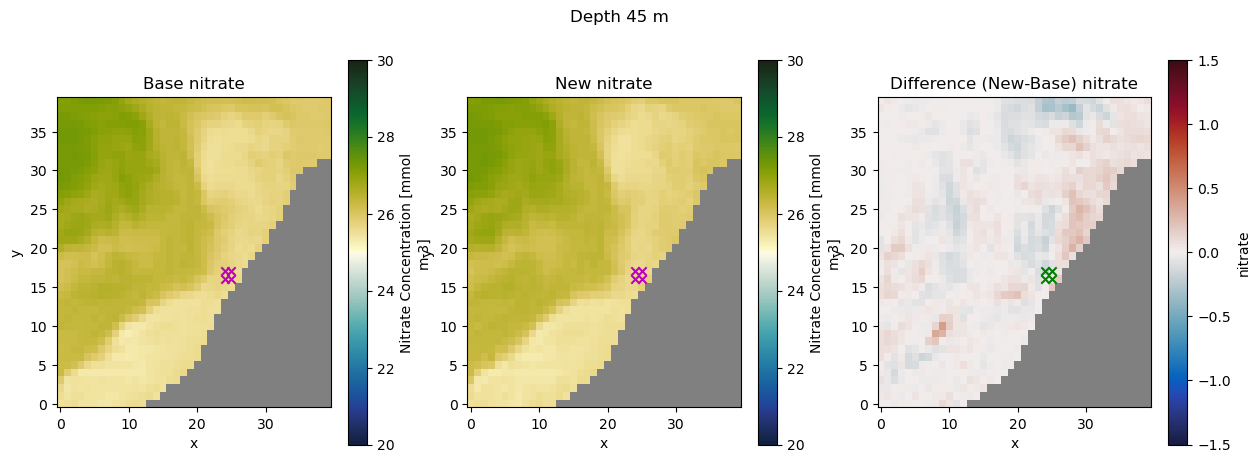

In [7]:
planview(base_nitrate, new, 'nitrate', 119, 23 , cm_delta, 30, 20, 1.5)

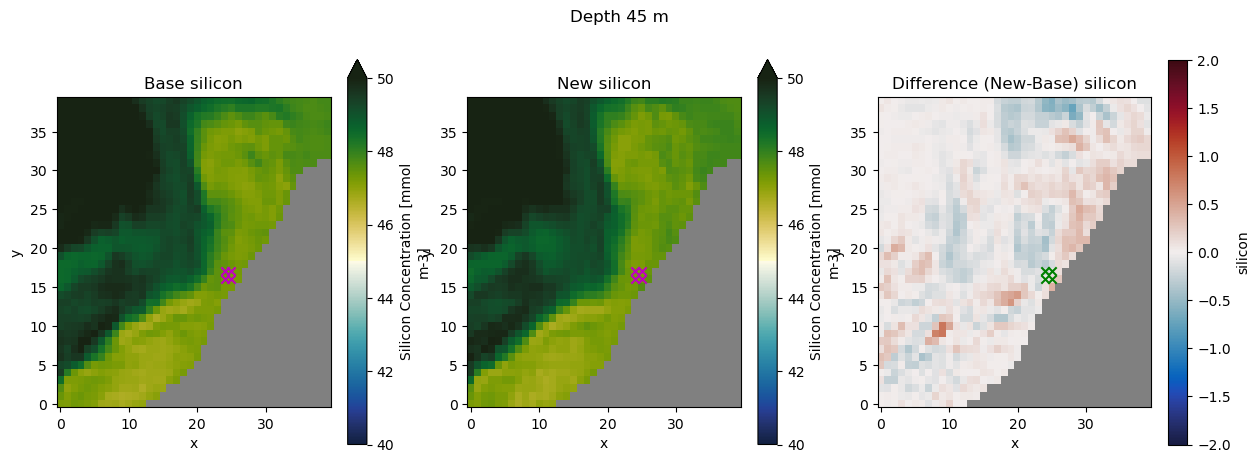

In [8]:
planview(base_silicon, new, 'silicon', 119, 23 , cm_delta, 50, 40, 2)

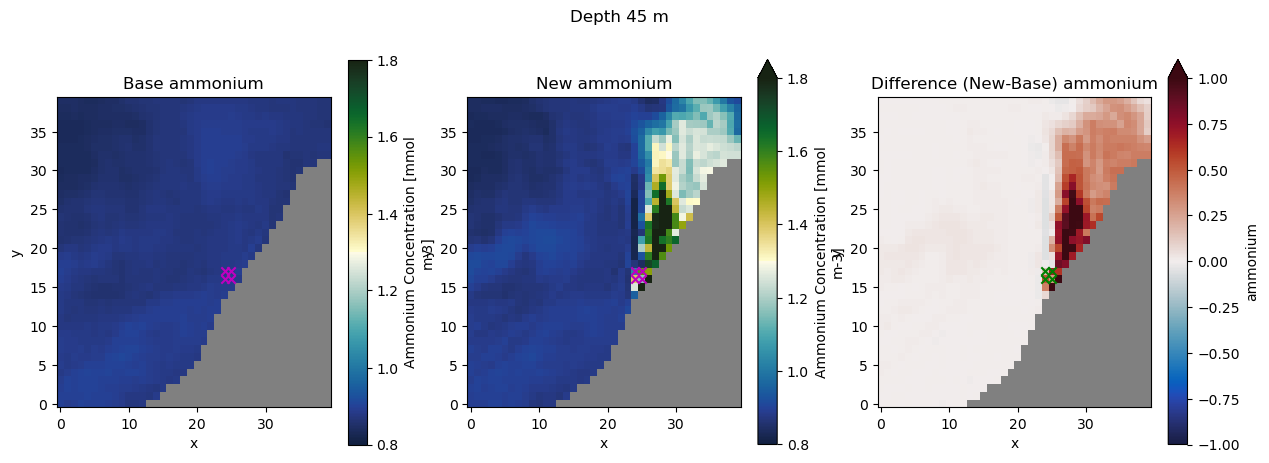

In [9]:
planview(base_ammonium, new, 'ammonium', 119, 23 , cm_delta, 1.8, 0.8, 1)

In [7]:
def verticalview(base, new, field, it, dep, cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, dep, 250+iz:350-iz].where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, dep, 250+iz:350-iz]-
     base[field][it, :, dep, 250+iz:350-iz]).where(
         tmask[ :, dep, 250+iz:350-iz]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')


    fig.suptitle(f'Vertical view at y = {dep}')

    if dep == 446:
     axs[0].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 98, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 76, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 98, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 76, marker = 'x', color = 'g')
    else:
     axs[0].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[0].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[1].scatter(304 - 280, 121, marker = 'x', color = 'm')
     axs[1].scatter(305 - 280, 98, marker = 'x', color = 'm')

     axs[2].scatter(304 - 280, 121, marker = 'x', color = 'g')
     axs[2].scatter(305 - 280, 98, marker = 'x', color = 'g')
       
         


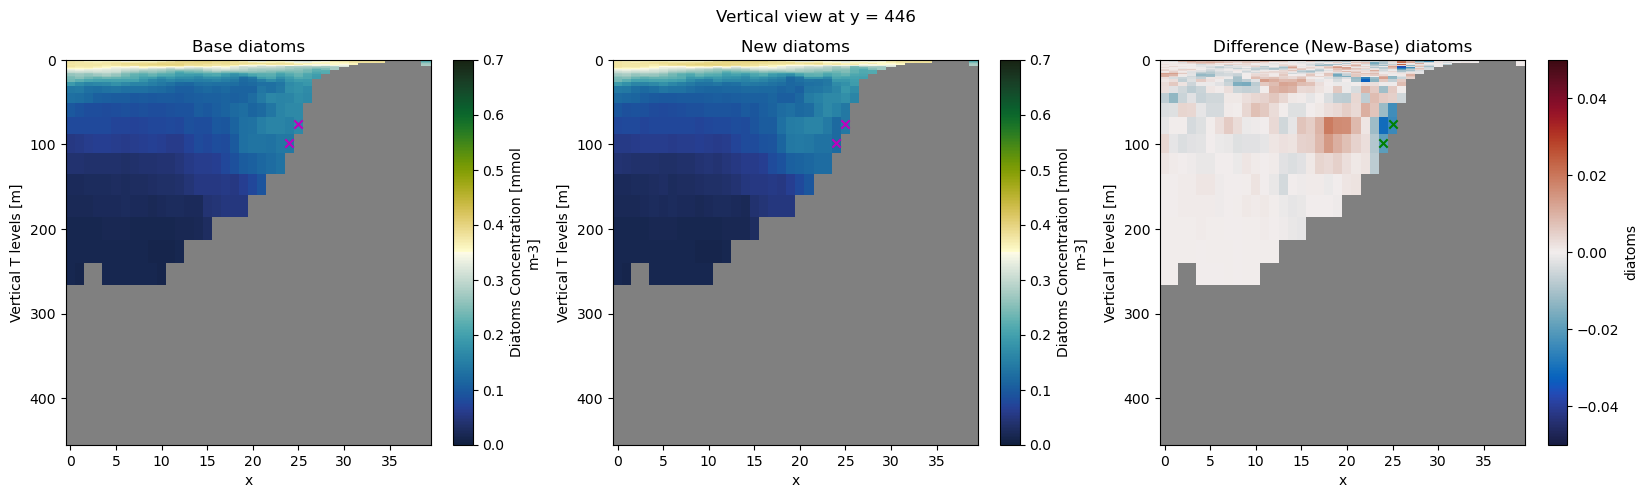

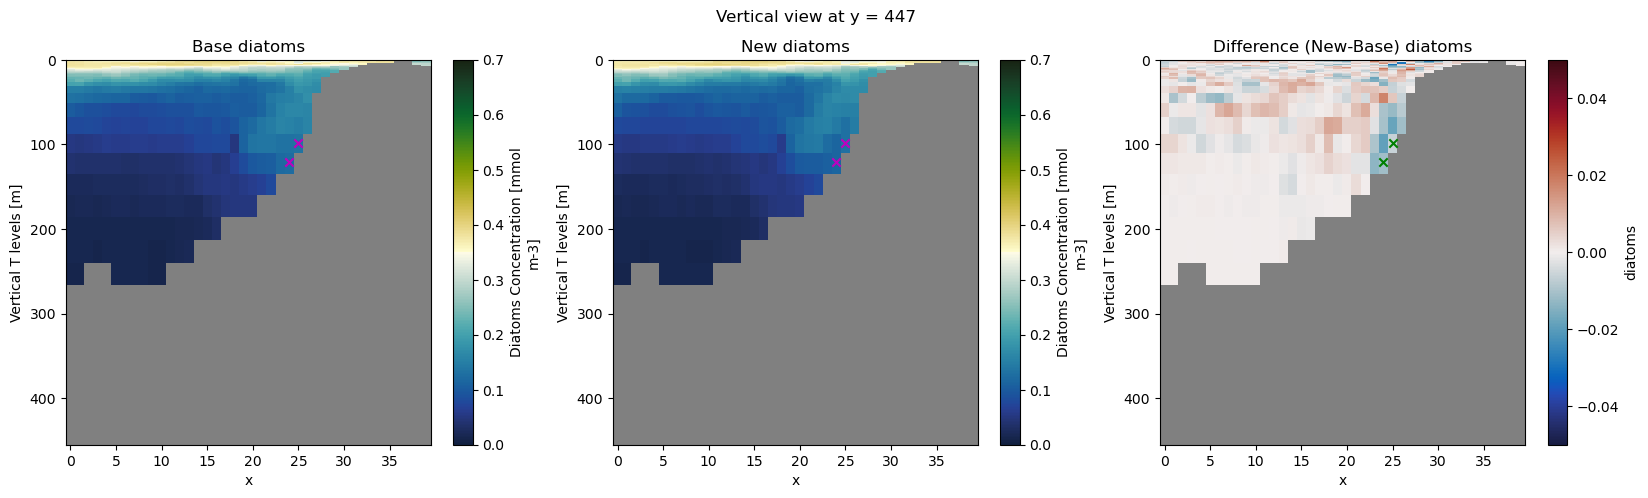

In [8]:
verticalview(base_diatoms, new, 'diatoms', 119, 446, cm_delta, 0.7, 0, 0.05)
verticalview(base_diatoms, new, 'diatoms', 119, 447, cm_delta, 0.7, 0, 0.05)

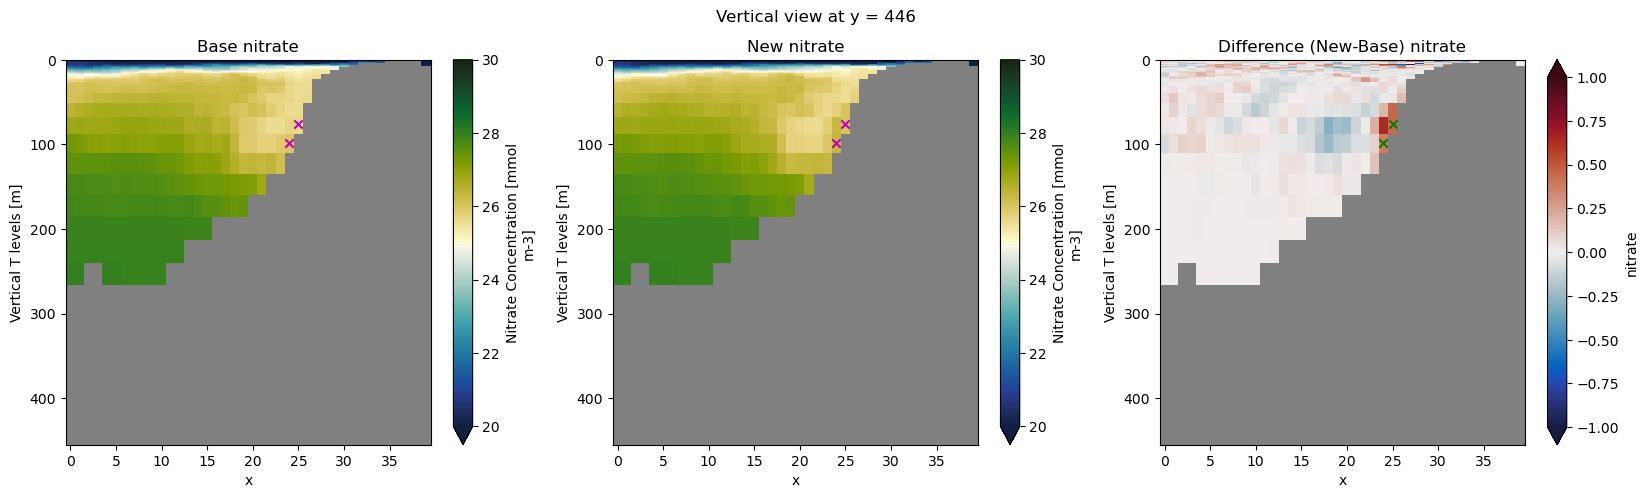

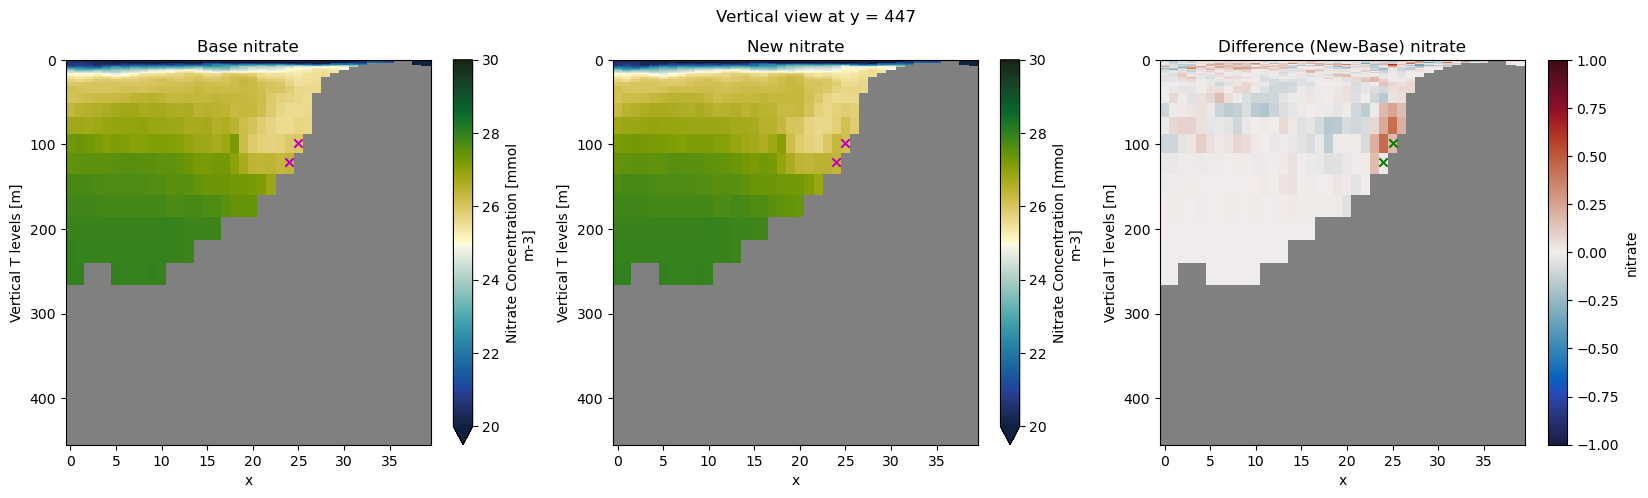

In [10]:
verticalview(base_nitrate, new, 'nitrate', 119, 446, cm_delta, 30, 20, 1)
verticalview(base_nitrate, new, 'nitrate', 119, 447, cm_delta, 30, 20, 1)

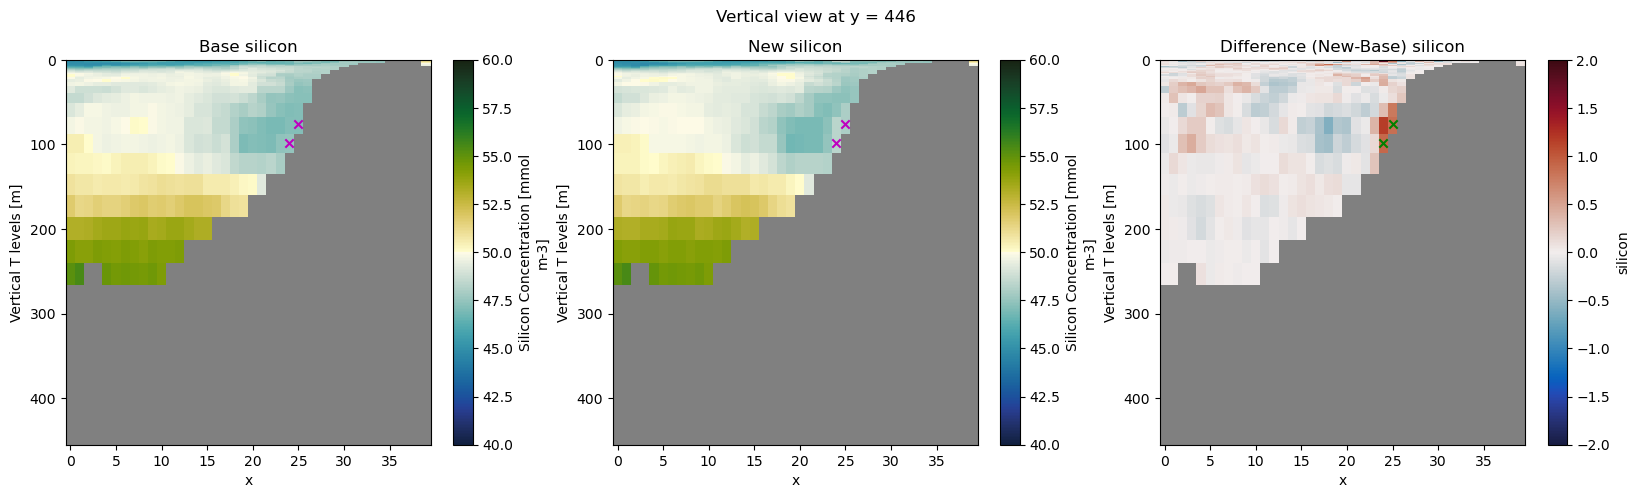

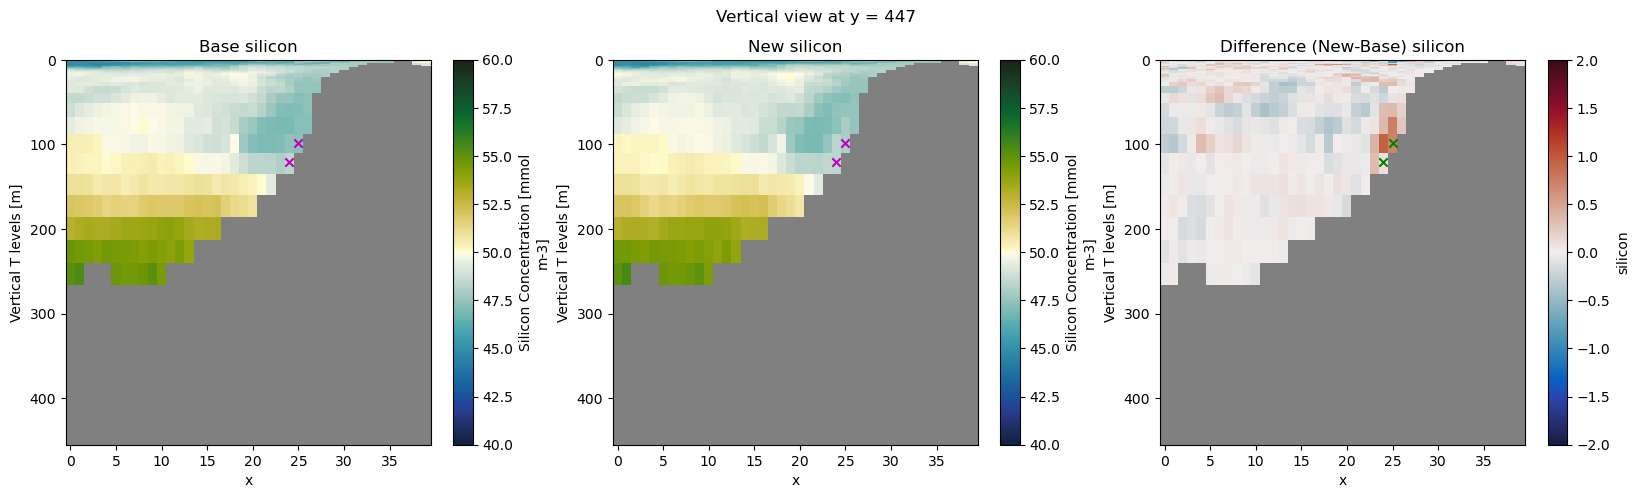

In [11]:
verticalview(base_silicon, new, 'silicon', 119, 446, cm_delta, 60, 40, 2)
verticalview(base_silicon, new, 'silicon', 119, 447, cm_delta, 60, 40, 2)

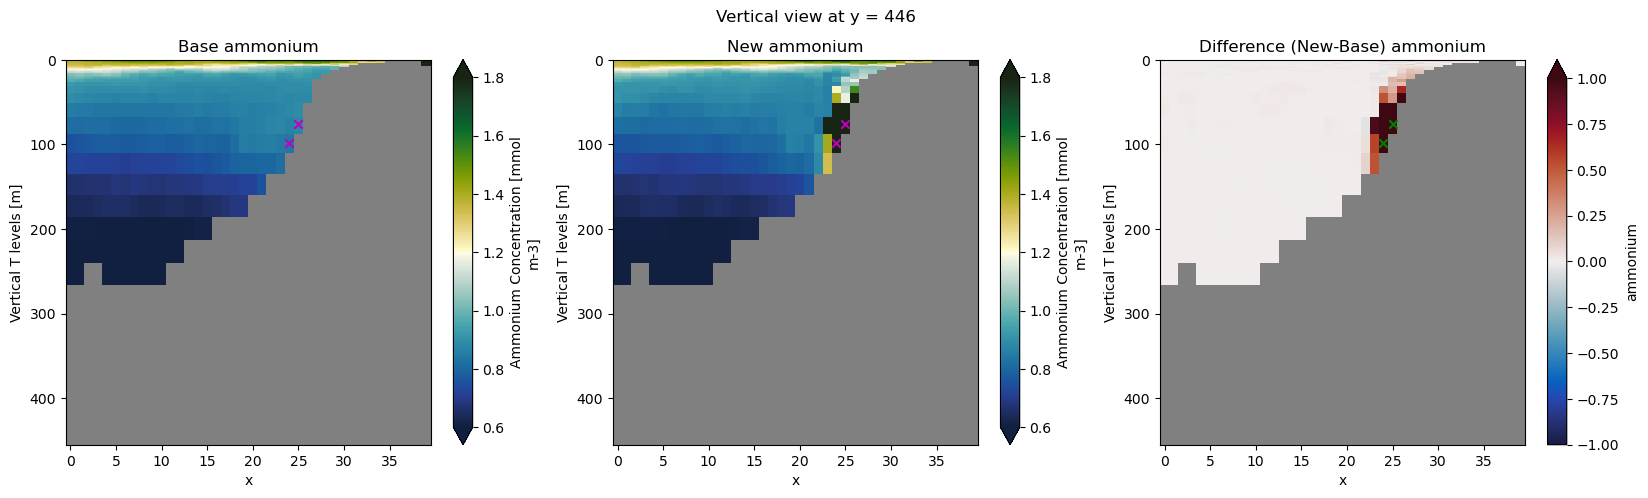

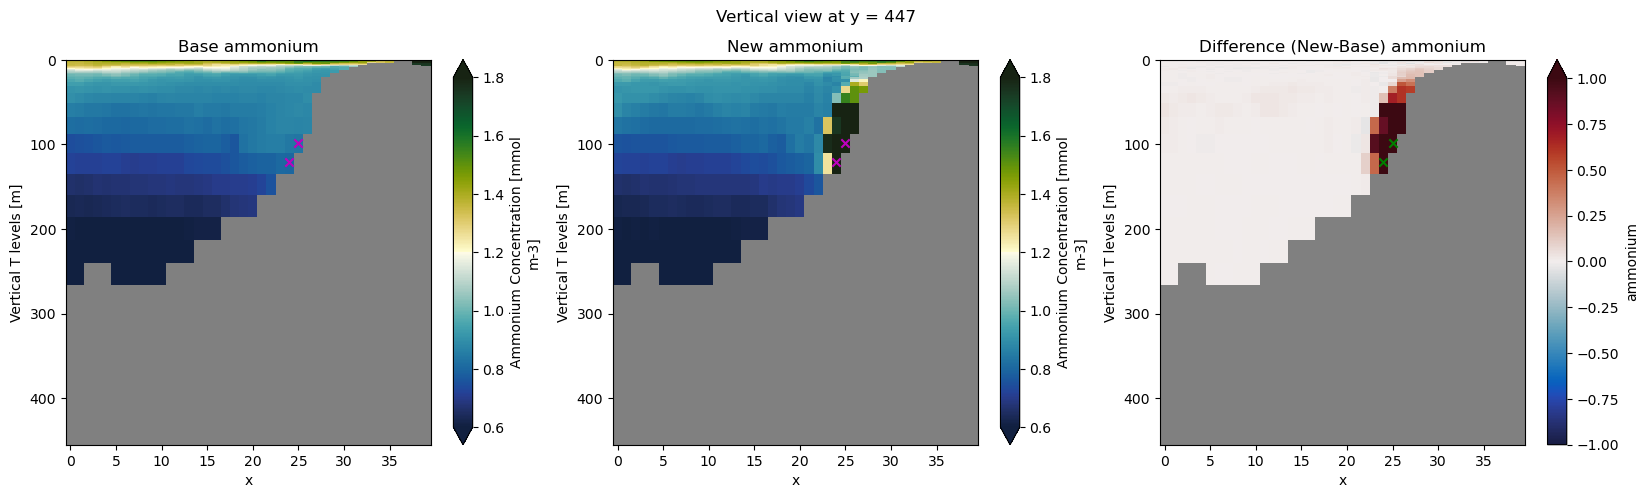

In [12]:
verticalview(base_ammonium, new, 'ammonium', 119, 446 , cm_delta, 1.8, 0.6, 1)
verticalview(base_ammonium, new, 'ammonium', 119, 447 , cm_delta, 1.8, 0.6, 1)

In [13]:
def vertical_view_x(base, new, field, it, dep,  cmap, vmax, vmin, dvmax):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    iz = 30  # width of domain plotted
    
    base[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[0], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[0].set_title(f'Base {field}')

    new[field][it, :, 400+iz:500-iz, dep].where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[1], cmap=cmap, vmax=vmax, vmin=vmin, yincrease = False)
    axs[1].set_title(f'New {field}')
    
    (new[field][it, :, 400+iz:500-iz, dep]-
     base[field][it, :, 400+iz:500-iz, dep]).where(
        tmask[:, 400+iz:500-iz, dep]).plot(ax=axs[2], cmap=cm_bwr, 
                                        vmax=dvmax, vmin=-dvmax, yincrease = False)
    axs[2].set_title(f'Difference (New-Base) {field}')

    fig.suptitle(f'Vertical view at x = {dep}')

    if dep == 304:
        axs[0].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 121, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 98, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 121, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 98, marker = 'x', color = 'g')
    
    else:
        axs[0].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[0].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[1].scatter(447 - 430, 98, marker = 'x', color = 'm')
        axs[1].scatter(446 - 430, 76, marker = 'x', color = 'm')

        axs[2].scatter(447 - 430, 98, marker = 'x', color = 'g')
        axs[2].scatter(446 - 430, 76, marker = 'x', color = 'g')


    

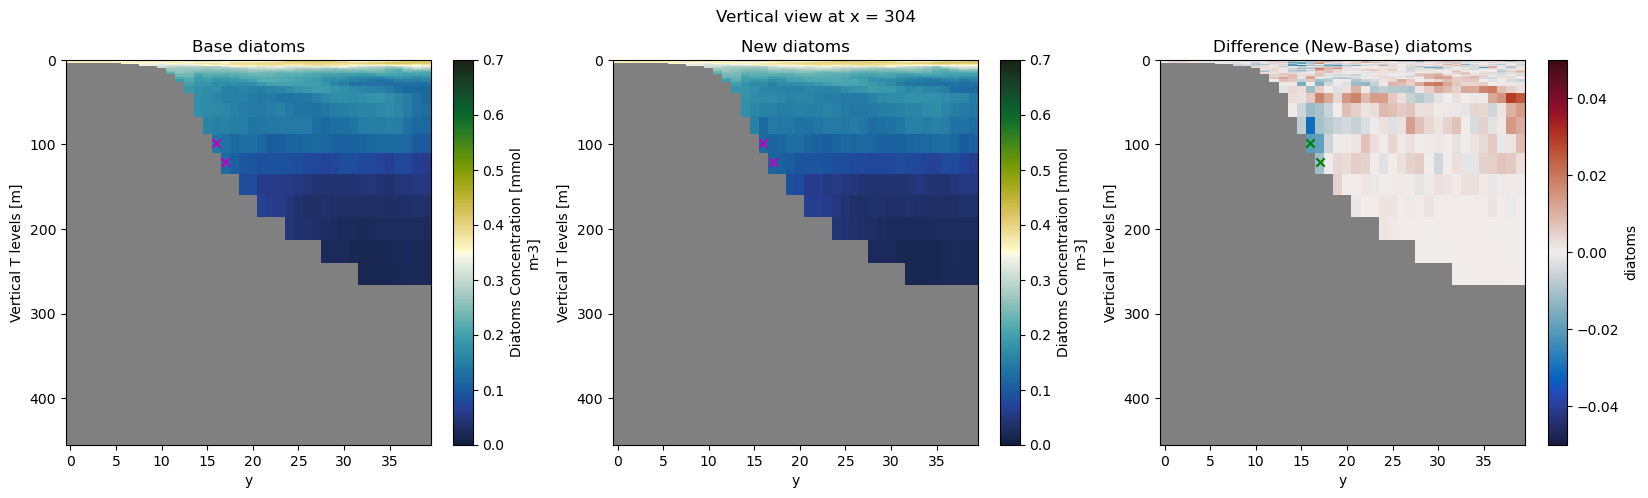

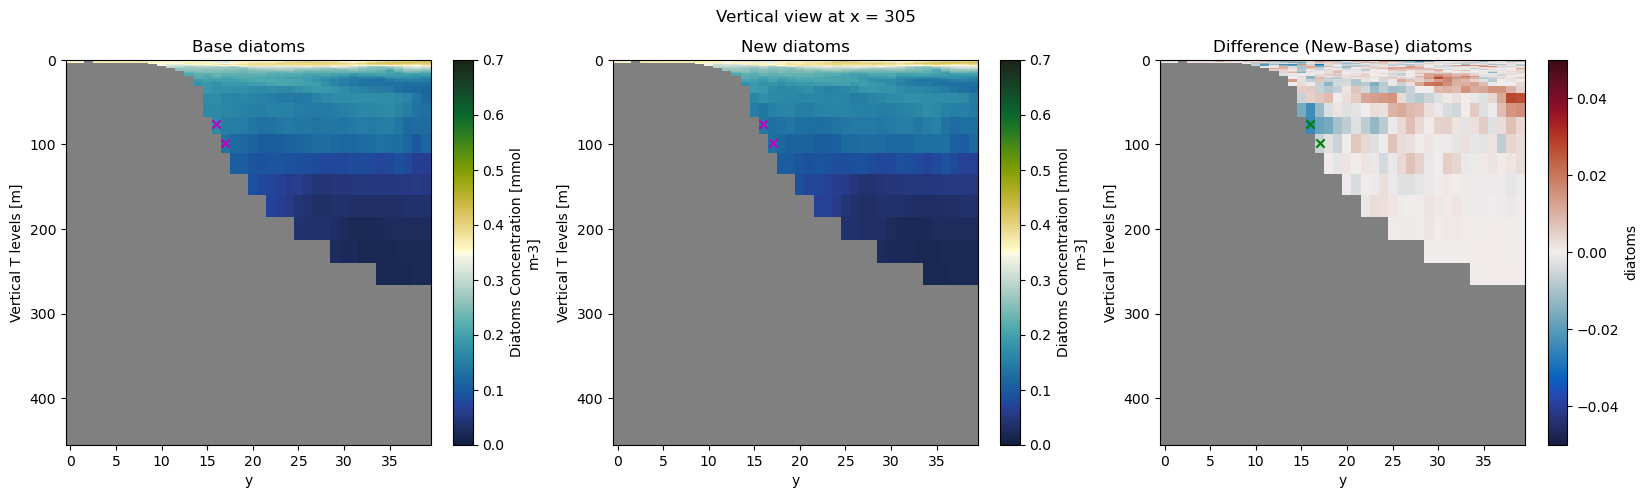

In [14]:
vertical_view_x(base_diatoms, new, 'diatoms', 119, 304, cm_delta, 0.7, 0, 0.05)
vertical_view_x(base_diatoms, new, 'diatoms', 119, 305, cm_delta, 0.7, 0, 0.05)

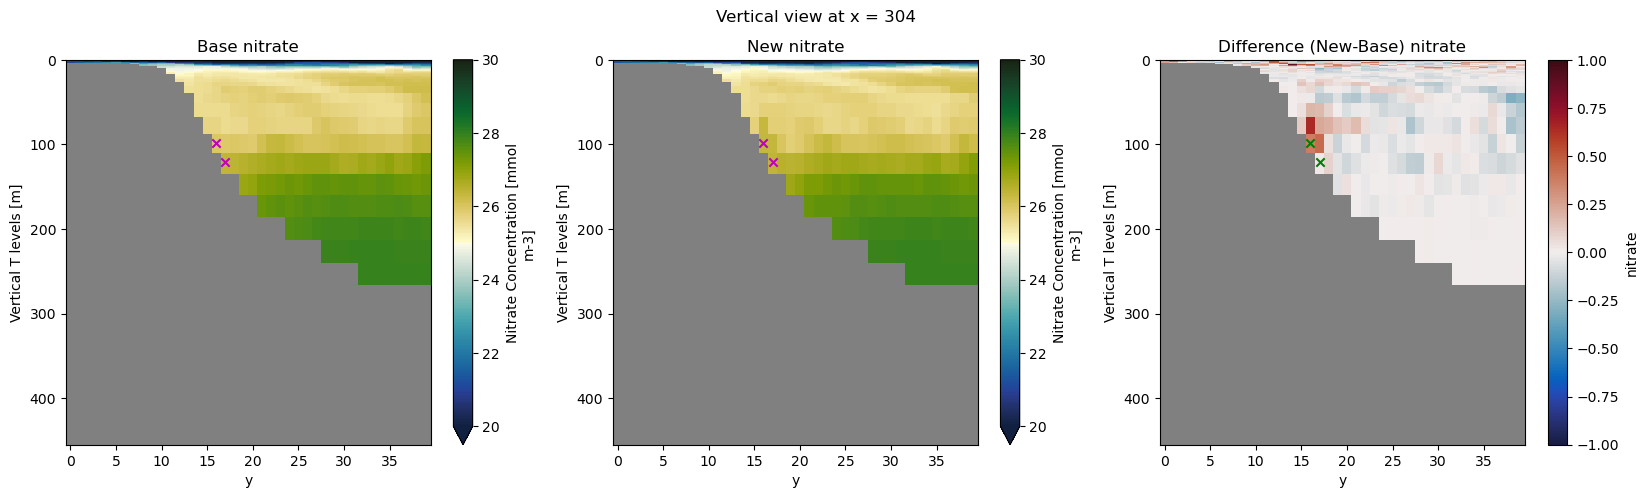

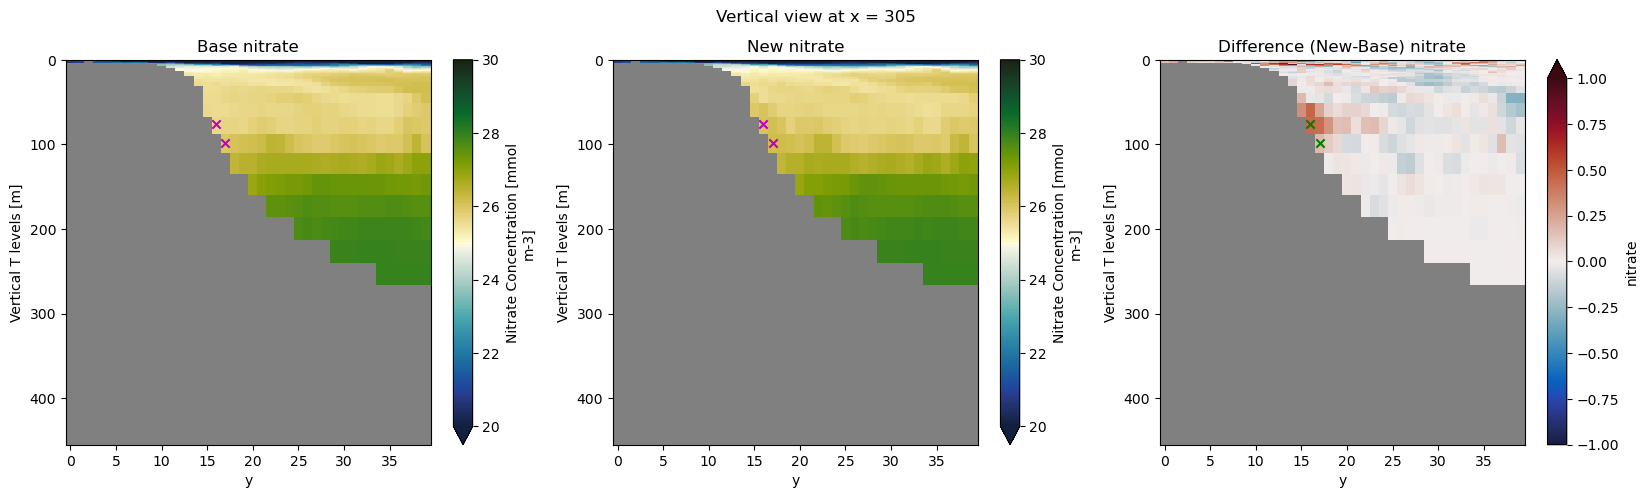

In [15]:
vertical_view_x(base_nitrate, new, 'nitrate', 119, 304, cm_delta, 30, 20, 1)
vertical_view_x(base_nitrate, new, 'nitrate', 119, 305, cm_delta, 30, 20, 1)

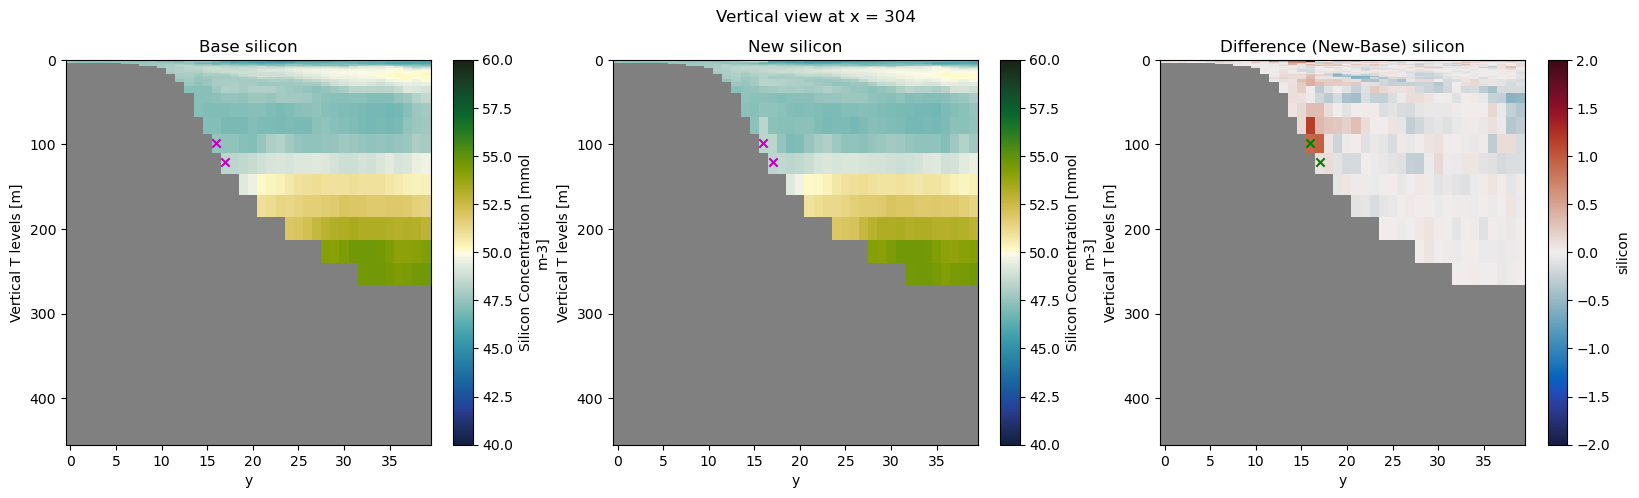

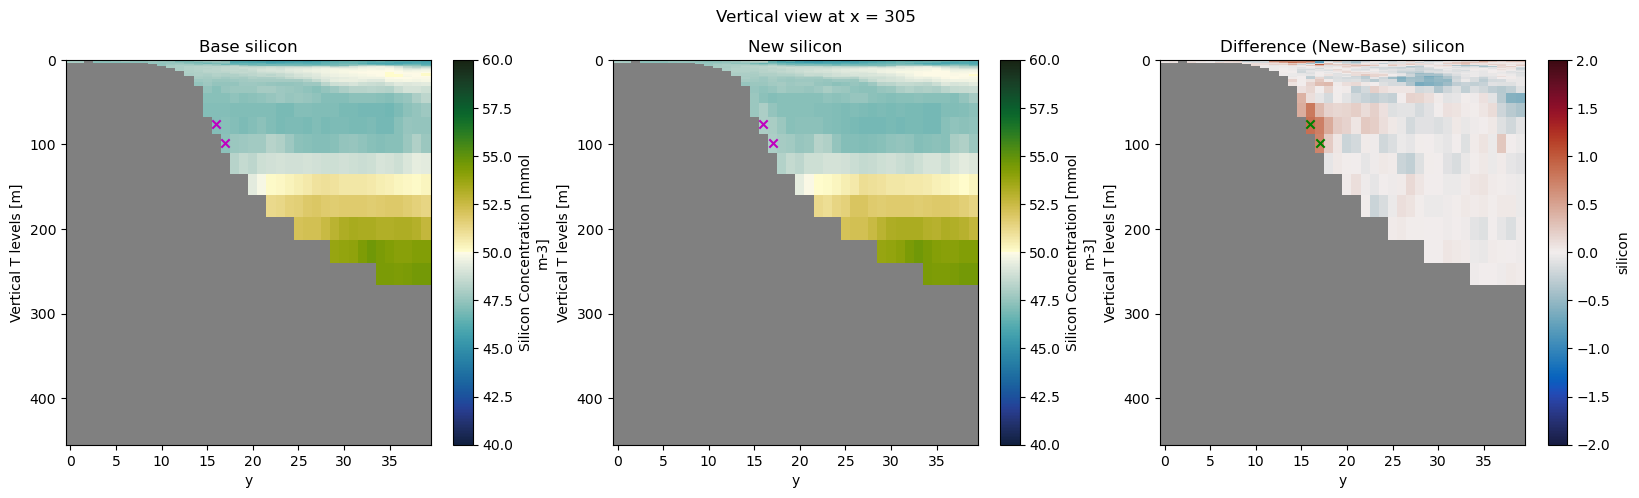

In [16]:
vertical_view_x(base_silicon, new, 'silicon', 119, 304, cm_delta, 60, 40, 2)
vertical_view_x(base_silicon, new, 'silicon', 119, 305, cm_delta, 60, 40, 2)

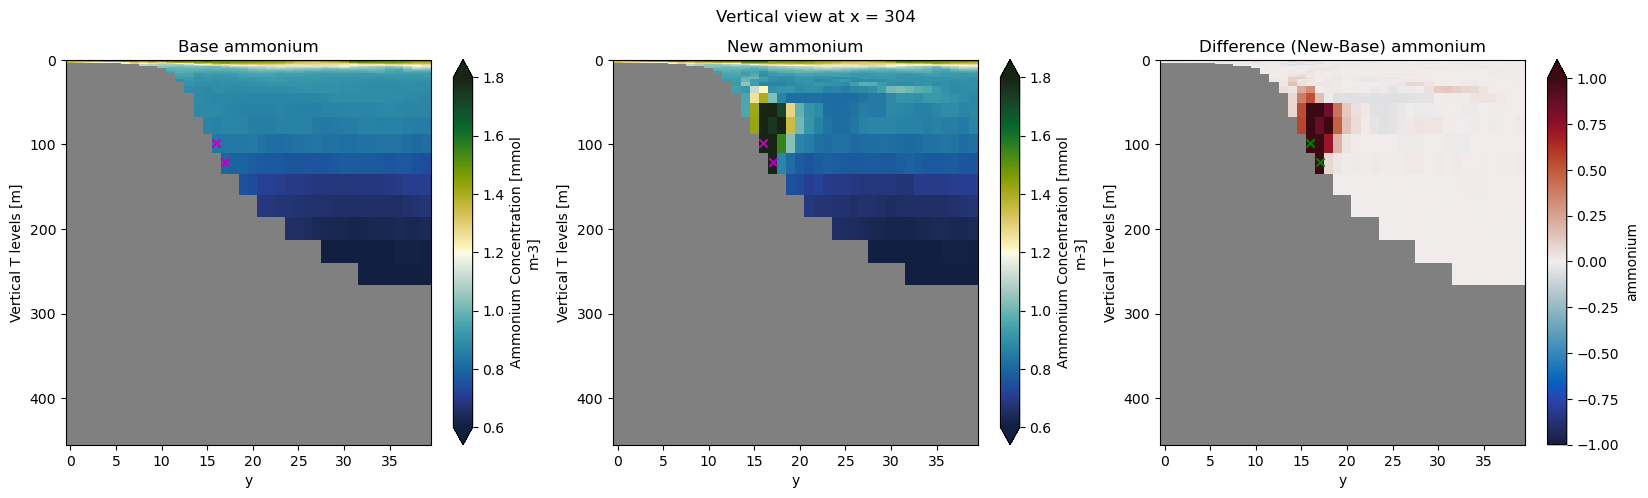

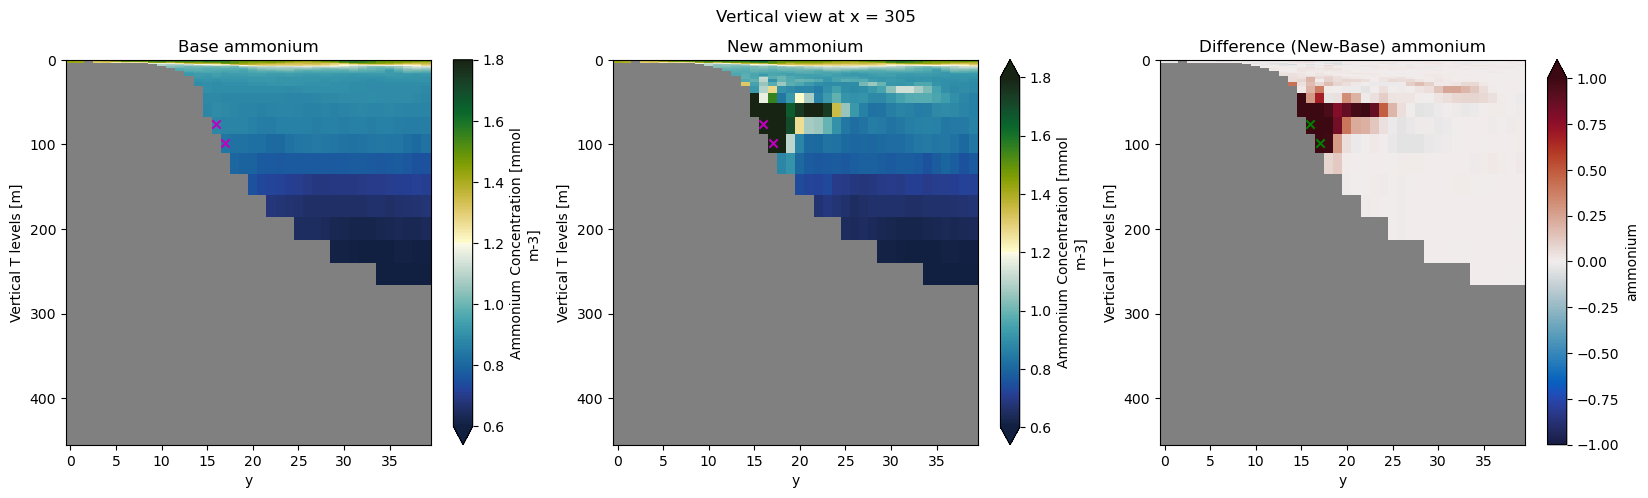

In [17]:
vertical_view_x(base_ammonium, new, 'ammonium', 119, 304 , cm_delta, 1.8, 0.6, 1)
vertical_view_x(base_ammonium, new, 'ammonium', 119, 305 , cm_delta, 1.8, 0.6, 1)

In [23]:
iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)
depth = slice(0,26)

new_slice = new.isel(y = y_slice, x = x_slice)
base_diatoms_slice = base_diatoms.isel(y = y_slice, x = x_slice)
base_nitrate_slice = base_nitrate.isel(y = y_slice, x = x_slice)
base_silicon_slice = base_silicon.isel(y = y_slice, x = x_slice)
base_ammonium_slice = base_ammonium.isel(y = y_slice, x = x_slice)

In [21]:
def plotSumDiffTimeLine(base, new, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 1, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    max_depth = sum_diff.argmax(dim = 'deptht') 
    sum_diff.plot(ax=axs, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs.set_title(f'Time Series for Sum of difference for {field}')
    axs.plot(sum_diff['time_counter'], sum_diff['deptht'][max_depth], 'r-')
    axs.set_ylim(150, 0)

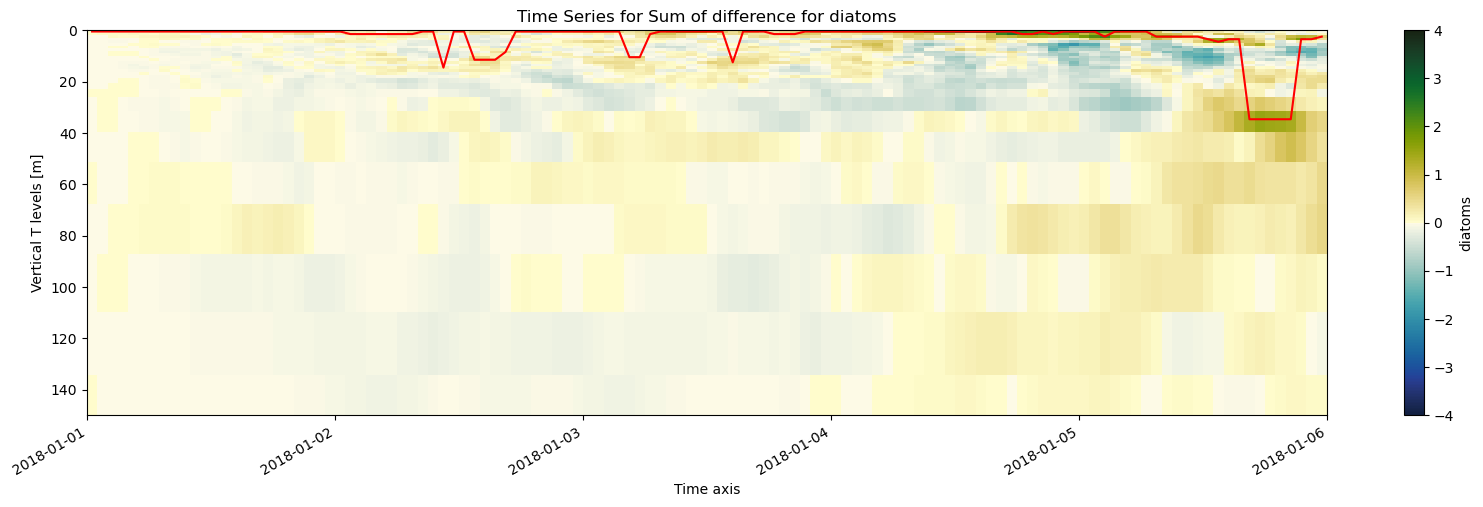

In [24]:
plotSumDiffTimeLine(base_diatoms_slice, new_slice, 'diatoms', -4, 4, cm_delta)

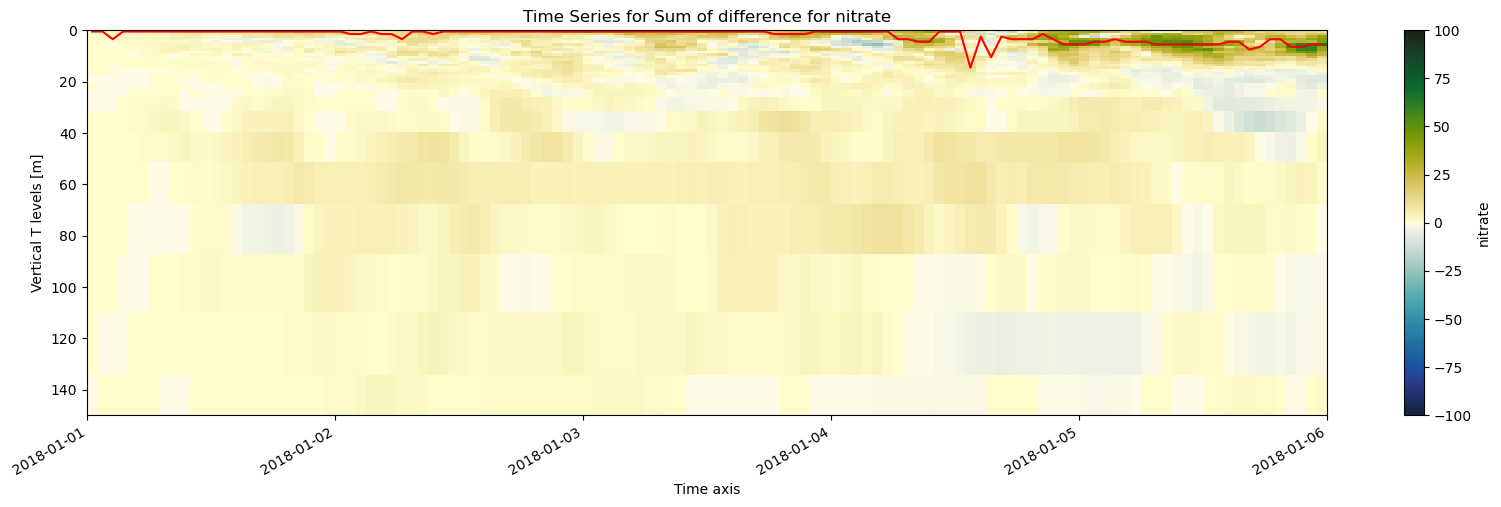

In [31]:
plotSumDiffTimeLine(base_nitrate_slice, new_slice, 'nitrate', -100, 100, cm_delta)

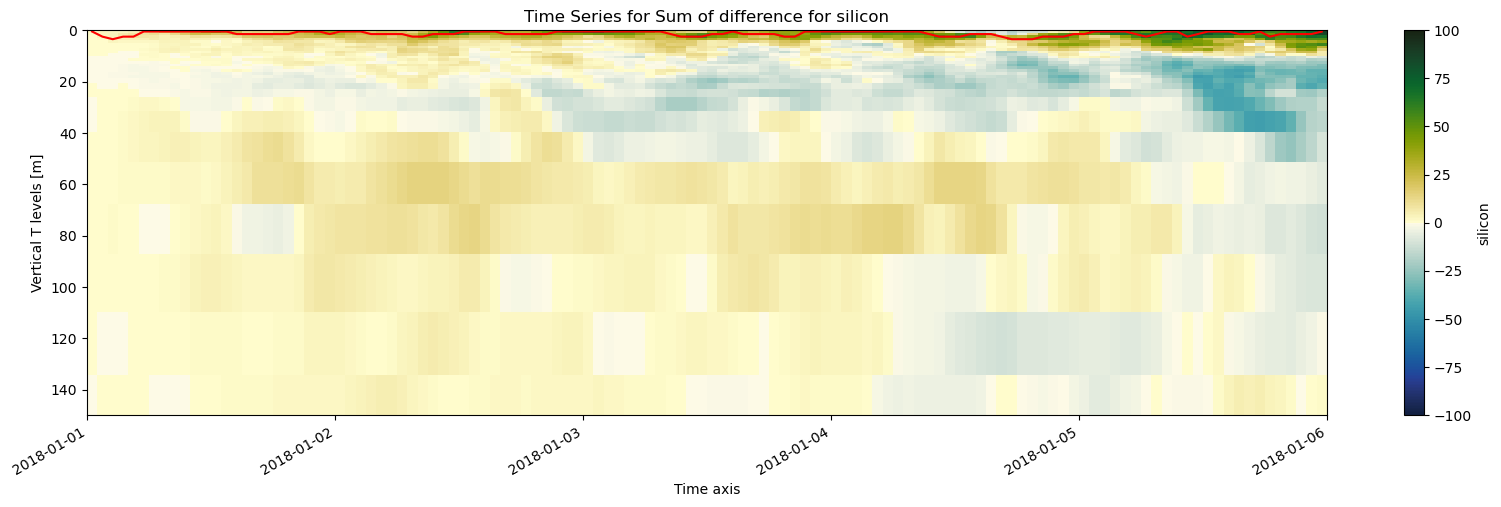

In [30]:
plotSumDiffTimeLine(base_silicon_slice, new_slice, 'silicon', -100, 100, cm_delta)

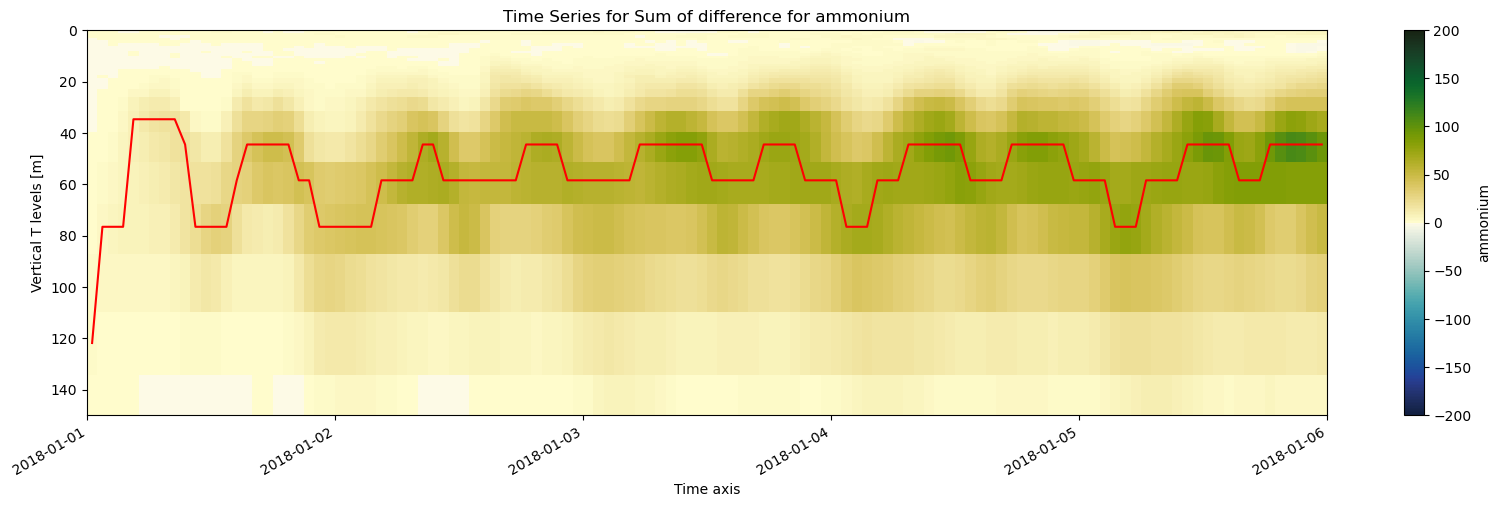

In [29]:
plotSumDiffTimeLine(base_ammonium_slice, new_slice, 'ammonium', -200, 200, cm_delta)